In [2]:
#importing packeges
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder

import lazypredict
from lazypredict.Supervised import LazyClassifier

import plotly.express as px

from scipy import stats
from matplotlib import pyplot as plt
sns.set_theme()

In [3]:
# create DataFrame
df=pd.read_csv('Churn_Modelling.csv')
df.drop_duplicates()
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [4]:
# DataFrame columns
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
# delete unnecessary columns
del df['RowNumber']
del df['CustomerId']
del df['Surname']

# convert object type oclumns into string type
df['Geography']=df['Geography'].astype('string')
df['Gender']=df['Gender'].astype('string')
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
# numerical columns info
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,650.53,38.92,5.01,76485.89,1.53,0.71,0.52,100090.24,0.20
std,96.65,10.49,2.89,62397.41,0.58,0.46,0.50,57510.49,0.40
min,350.00,18.00,0.00,0.00,1.00,0.00,0.00,11.58,0.00
25%,584.00,32.00,3.00,0.00,1.00,0.00,0.00,51002.11,0.00
50%,652.00,37.00,5.00,97198.54,1.00,1.00,1.00,100193.91,0.00
75%,718.00,44.00,7.00,127644.24,2.00,1.00,1.00,149388.25,0.00
max,850.00,92.00,10.00,250898.09,4.00,1.00,1.00,199992.48,1.00


In [8]:
df.quantile([0.05, 0.25, 0.5, 0.75, 0.95])

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0.05,489.00,25.00,1.00,0.00,1.00,0.00,0.00,9851.82,0.00
0.25,584.00,32.00,3.00,0.00,1.00,0.00,0.00,51002.11,0.00
0.50,652.00,37.00,5.00,97198.54,1.00,1.00,1.00,100193.91,0.00
0.75,718.00,44.00,7.00,127644.24,2.00,1.00,1.00,149388.25,0.00
0.95,812.00,60.00,9.00,162711.67,2.00,1.00,1.00,190155.38,1.00


In [9]:
# categorical columns info
print(df['Geography'].unique())
print(df['Gender'].unique())

<StringArray>
['France', 'Spain', 'Germany']
Length: 3, dtype: string
<StringArray>
['Female', 'Male']
Length: 2, dtype: string


<AxesSubplot:xlabel='Exited', ylabel='count'>

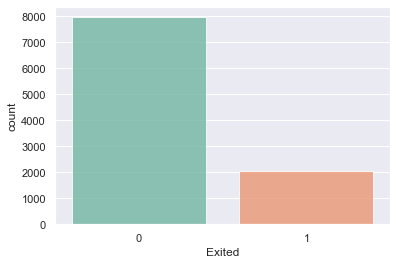

In [10]:
sns.countplot(x=df['Exited'], palette='Set2', alpha=0.8)

<AxesSubplot:>

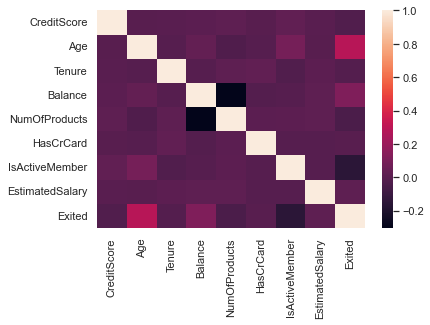

In [11]:
sns.heatmap(df.corr())

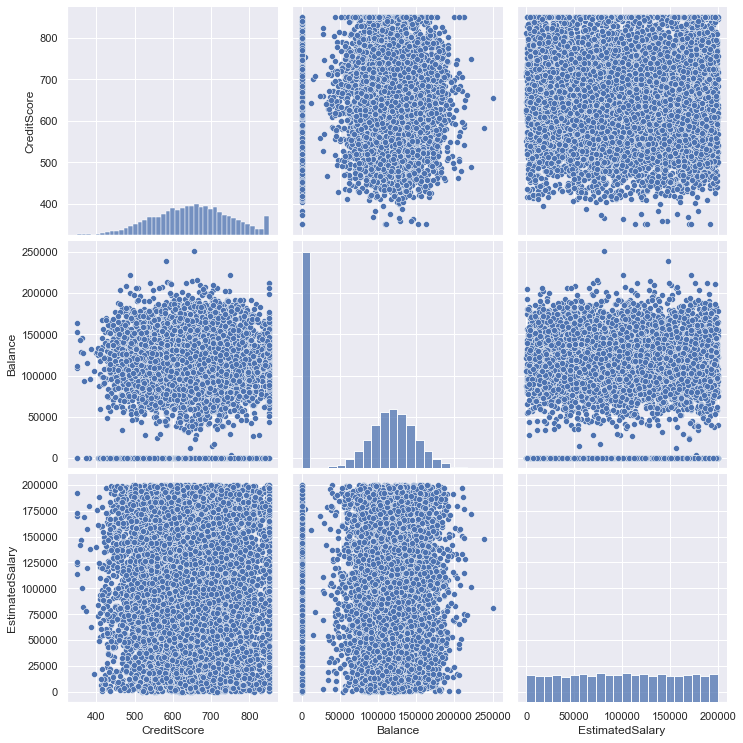

In [12]:
# numerical features distribution
sns.pairplot(df.loc[:, ['CreditScore', 'Balance', 'EstimatedSalary']], palette='Set2', height=3.5)

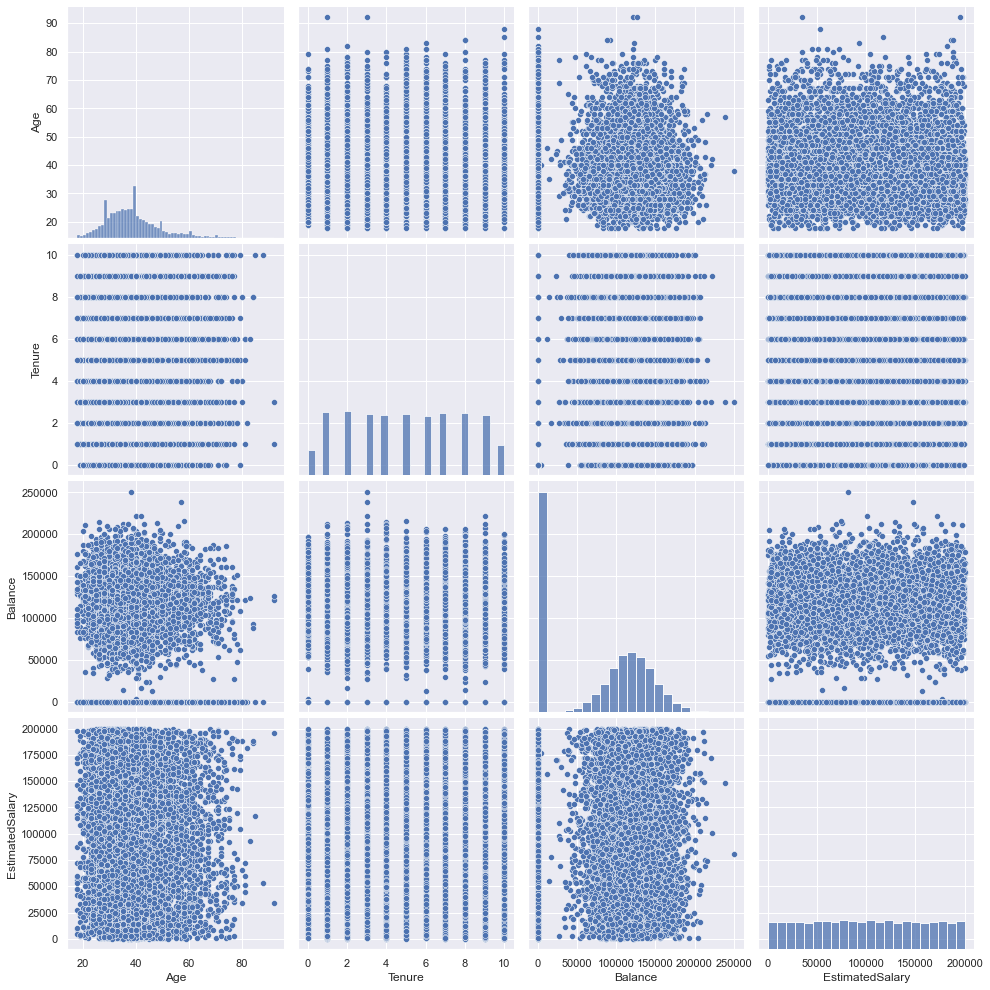

In [13]:
sns.pairplot(df.loc[:, ['Age', 'Tenure', 'Balance', 'EstimatedSalary']], palette='Set2', height=3.5)

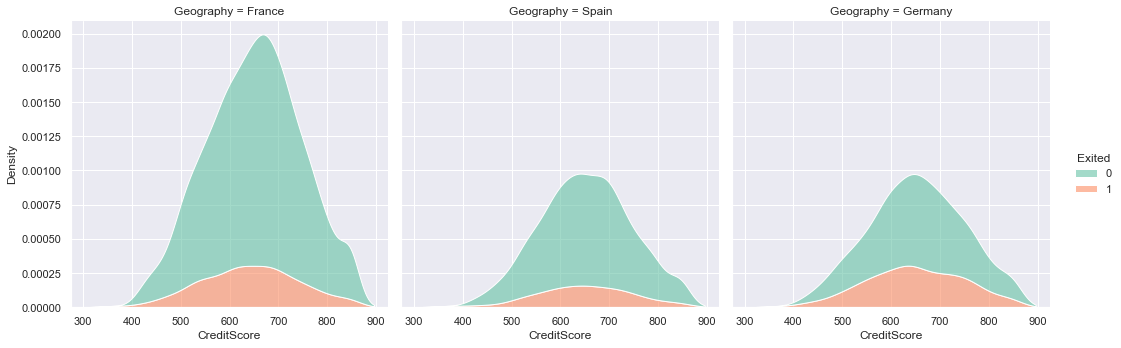

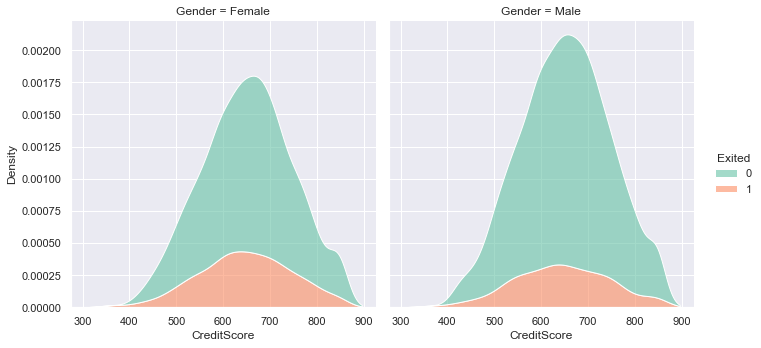

In [14]:
# CreditScore	Age	Tenure	Balance	NumOfProducts	HasCrCard	IsActiveMember	EstimatedSalary	Exited
sns.displot(df, x='CreditScore', hue='Exited', col='Geography', kind='kde', multiple='stack', palette='Set2', alpha=0.6, col_wrap=3)
sns.displot(df, x='CreditScore', hue='Exited', col='Gender', kind='kde', multiple='stack', palette='Set2', alpha=0.6, col_wrap=2)

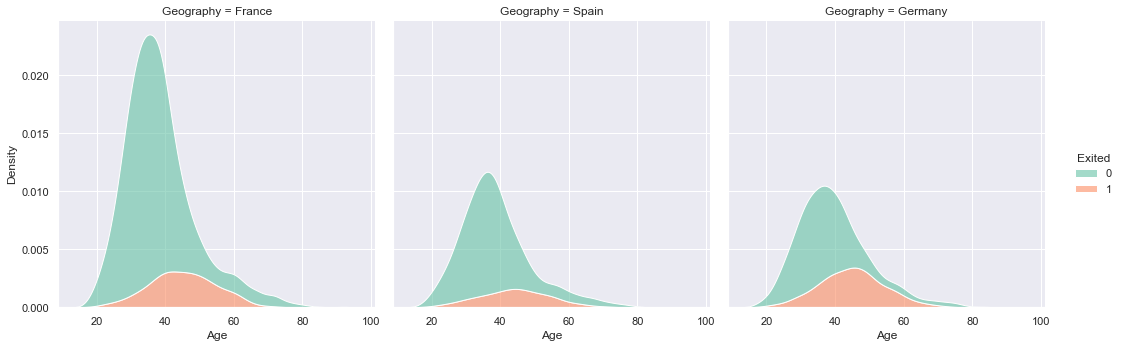

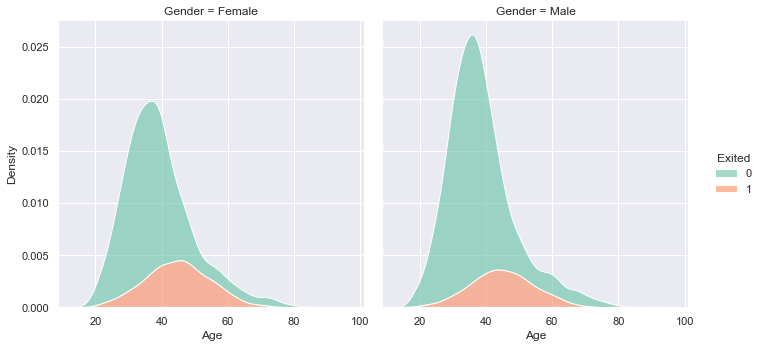

In [15]:
# CreditScore	Age	Tenure	Balance	NumOfProducts	HasCrCard	IsActiveMember	EstimatedSalary	Exited
sns.displot(df, x='Age', hue='Exited', col='Geography', kind='kde', multiple='stack', palette='Set2', alpha=0.6, col_wrap=3)
sns.displot(df, x='Age', hue='Exited', col='Gender', kind='kde', multiple='stack', palette='Set2', alpha=0.6, col_wrap=2)

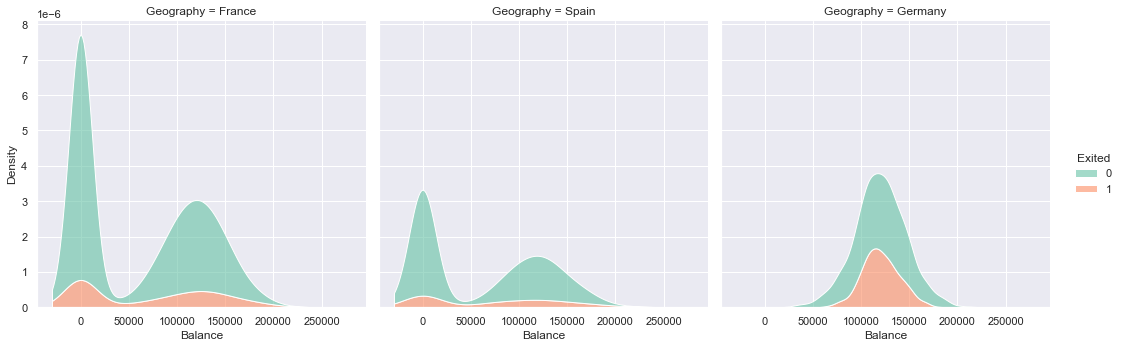

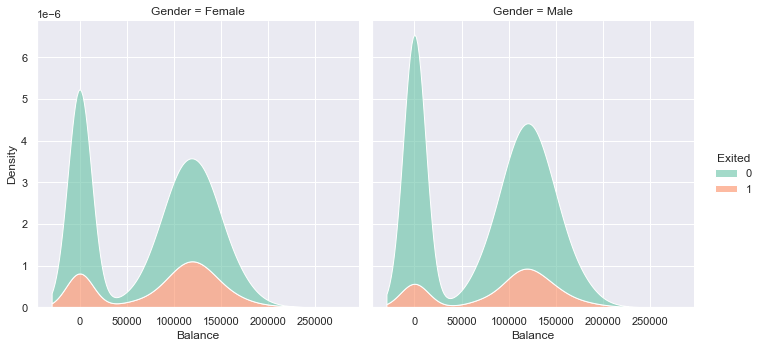

In [16]:
sns.displot(df, x='Balance', hue='Exited', col='Geography', kind='kde', multiple='stack', palette='Set2', alpha=0.6, col_wrap=3)
sns.displot(df, x='Balance', hue='Exited', col='Gender', kind='kde', multiple='stack', palette='Set2', alpha=0.6, col_wrap=2)

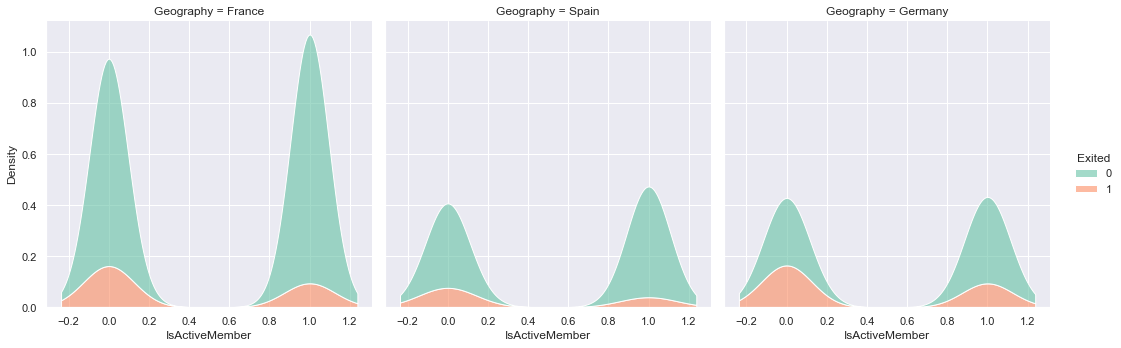

In [17]:
sns.displot(df, x='IsActiveMember', hue='Exited', col='Geography', kind='kde', multiple='stack', palette='Set2', alpha=0.6, col_wrap=3)

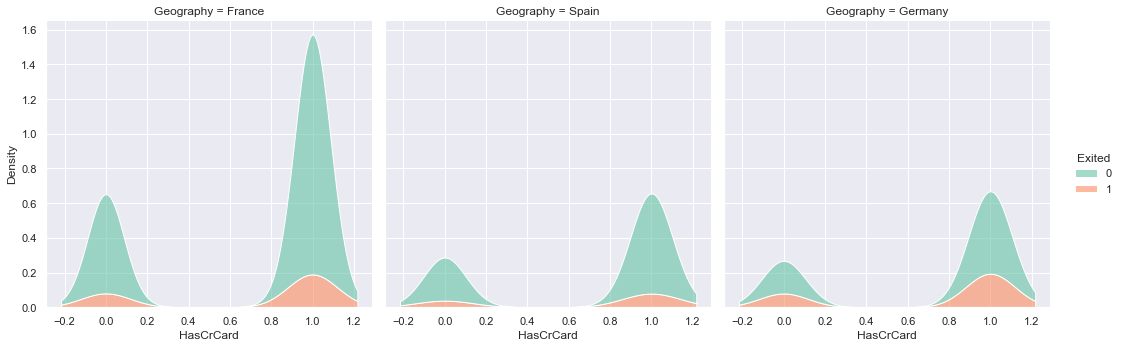

In [18]:
sns.displot(df, x='HasCrCard', hue='Exited', col='Geography', kind='kde', multiple='stack', palette='Set2', alpha=0.6, col_wrap=3)

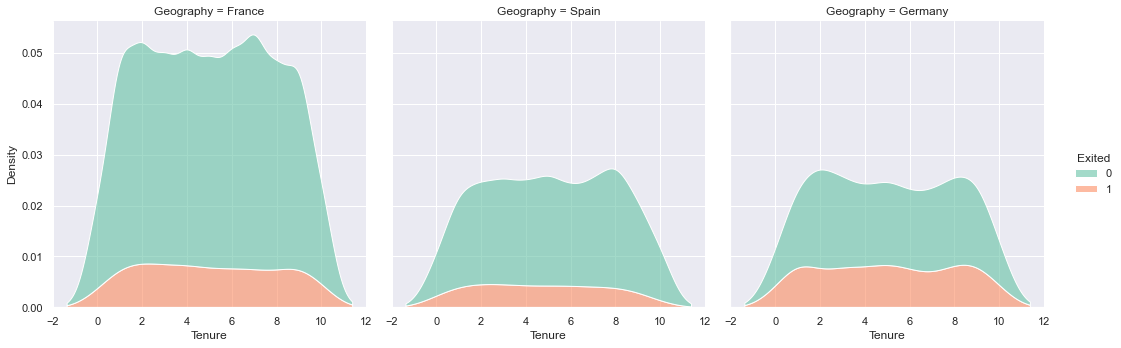

In [19]:
sns.displot(df, x='Tenure', hue='Exited', col='Geography', kind='kde', multiple='stack', palette='Set2', alpha=0.6, col_wrap=3)

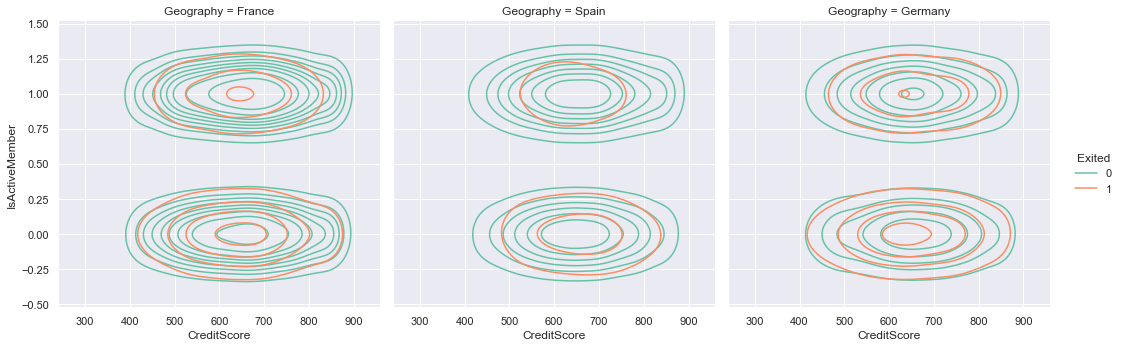

In [20]:
ax=sns.displot(data = df, x = 'CreditScore', y = 'IsActiveMember',  hue = 'Exited', col = 'Geography', col_wrap = 3, palette = 'Set2', kind = 'kde', scatter_kws={'alpha':0.6})

In [21]:
ax=sns.displot(data = df, x = 'Balance', y = 'IsActiveMember',  hue = 'Exited', col = 'Geography', col_wrap = 3, palette = 'Set2', kind = 'kde', scatter_kws={'alpha':0.6})

<AxesSubplot:xlabel='Geography', ylabel='count'>

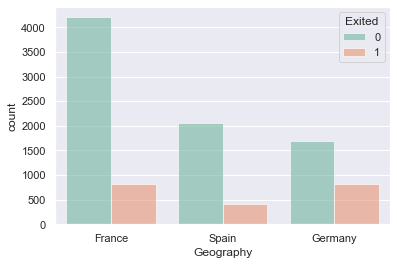

In [ ]:
sns.countplot(data=df, x='Geography', hue='Exited', alpha=0.6, palette='Set2')

<AxesSubplot:xlabel='Gender', ylabel='count'>

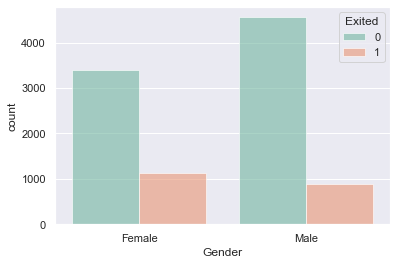

In [ ]:
sns.countplot(data=df, x='Gender', hue='Exited', alpha=0.6, palette='Set2')

<AxesSubplot:xlabel='Age', ylabel='Balance'>

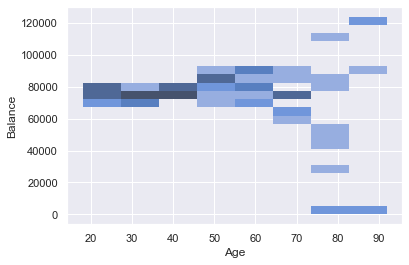

In [ ]:
balance=df.groupby(df['Age'])['Balance'].mean().reset_index()
sns.histplot(balance, x='Age', y='Balance')


In [ ]:
# convert categorical features into numerical
features=['Geography', 'Gender']
for feature in features:
    df[feature] = LabelEncoder().fit_transform(df[feature])

df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,772,1,1,42,3,75075.31,2,1,0,92888.52,1


In [11]:
#Feature Noramalization
features_to_noramalize=['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']
for feature in features_to_noramalize:
    min=df[feature].min()
    max=df[feature].max()
    df[feature]=list(map(lambda x: (x-min)/(max-min), df[feature]))

df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0.54,0,0,0.32,0.20,0.00,1,1,1,0.51,1
1,0.52,2,0,0.31,0.10,0.33,1,0,1,0.56,0
2,0.30,0,0,0.32,0.80,0.64,3,1,0,0.57,1
3,0.70,0,0,0.28,0.10,0.00,2,0,0,0.47,0
4,1.00,2,0,0.34,0.20,0.50,1,1,1,0.40,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,0.84,0,1,0.28,0.50,0.00,2,1,0,0.48,0
9996,0.33,0,1,0.23,1.00,0.23,1,1,1,0.51,0
9997,0.72,0,0,0.24,0.70,0.00,1,0,1,0.21,1
9998,0.84,1,1,0.32,0.30,0.30,2,1,0,0.46,1


In [42]:
X = df.copy()
X.drop('Exited',axis = 1,inplace = True)
y = df['Exited']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [13]:
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [14]:
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric = None,classifiers = 'all')
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

100%|██████████| 29/29 [00:20<00:00,  1.43it/s]


In [15]:
print(models)

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
AdaBoostClassifier                 0.86               0.74     0.74      0.85   
LGBMClassifier                     0.86               0.74     0.74      0.85   
RandomForestClassifier             0.86               0.73     0.73      0.85   
XGBClassifier                      0.85               0.72     0.72      0.84   
ExtraTreesClassifier               0.86               0.72     0.72      0.85   
BaggingClassifier                  0.84               0.70     0.70      0.83   
NearestCentroid                    0.70               0.70     0.70      0.72   
LabelPropagation                   0.80               0.70     0.70      0.80   
LabelSpreading                     0.80               0.70     0.70      0.80   
DecisionTreeClassifier             0.79               0.70     0.70      0.79   
SVC                         

In [1]:
m_train=X_train.shape[0]
m_test=X_test.shape[0]

X_train=np.array(X_train).reshape((X_train.shape[1], m_train))
X_test=np.array(X_test).reshape((X_test.shape[1], m_test))

y_train=np.array(y_train).reshape((1, m_train))
y_test=np.array(y_test).reshape((1, m_test))

print(f'Number of trainig exaples: {m_train}')
print(f'Number of testing exaples: {m_test}')
print(f'train_set_x shape: {X_train.shape}')
print(f'test_set_x shape: {X_test.shape}')
print(f'train_set_y shape: {y_train.shape}')
print(f'test_set_y shape: {y_test.shape}')

NameError: name 'X_train' is not defined

In [ ]:
print(f'test_set_x shape: {X_test.shape}')
print(f'train_set_y shape: {y_train.shape}')
print(f'test_set_y shape: {y_test.shape}')